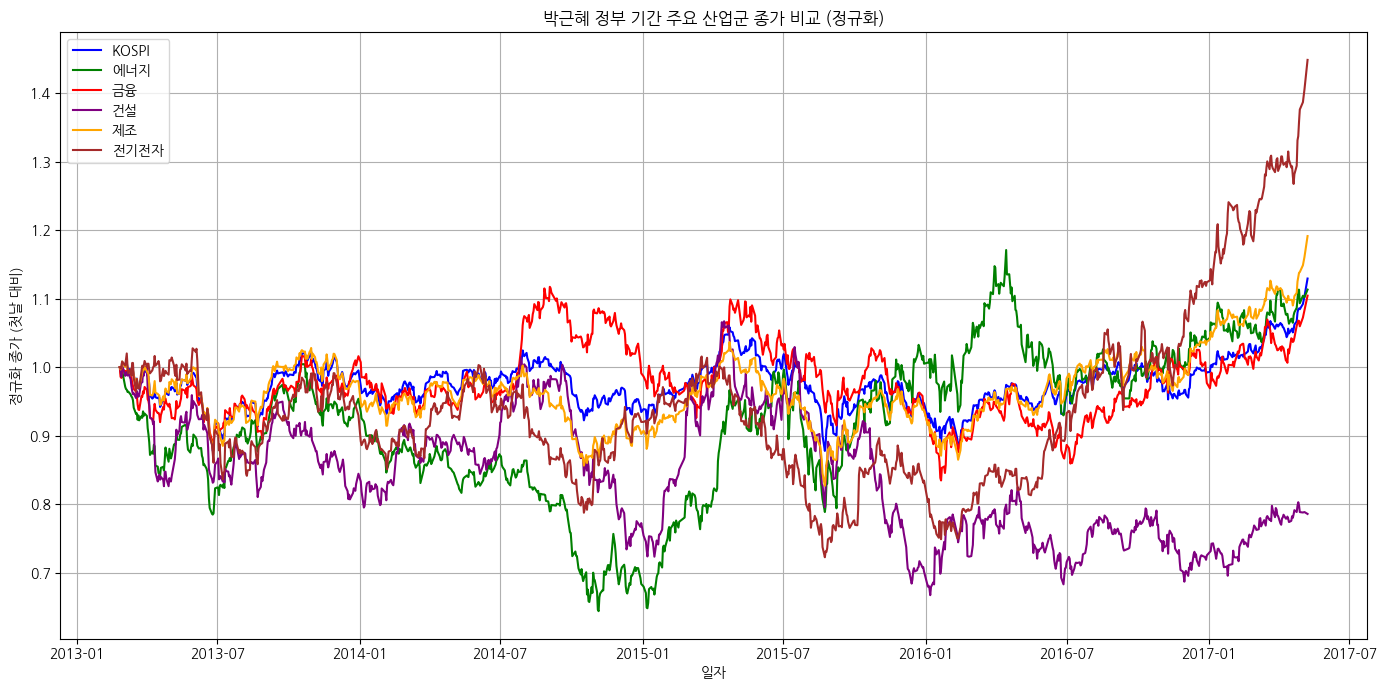

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

def load_and_prepare(csv_paths):
    dfs = [pd.read_csv(path, encoding='euc-kr') for path in csv_paths]
    df = pd.concat(dfs, ignore_index=True)
    df['일자'] = pd.to_datetime(df['일자'], errors='coerce')
    df = df.sort_values(by='일자')
    return df

# 데이터셋 정의
datasets = {
    'KOSPI': [
        "/home/taemin/dev_ws/EDA/data/pdata/KOSPI/p_KOSPI1.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/KOSPI/p_KOSPI2.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/KOSPI/p_KOSPI3.csv"
        ],
    '에너지': [
        "/home/taemin/dev_ws/EDA/data/pdata/energy/p_energy1.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/energy/p_energy2.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/energy/p_energy3.csv"
    ],
    '금융': [
        "/home/taemin/dev_ws/EDA/data/pdata/finance/p_finance1.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/finance/p_finance2.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/finance/p_finance3.csv"
    ],
    '건설': [
        "/home/taemin/dev_ws/EDA/data/pdata/construction/p_construction1.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/construction/p_construction2.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/construction/p_construction3.csv"
    ],
    '제조': [
        "/home/taemin/dev_ws/EDA/data/pdata/manufacturing/p_manufacturing1.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/manufacturing/p_manufacturing2.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/manufacturing/p_manufacturing3.csv"
    ],
    '전기전자': [
        "/home/taemin/dev_ws/EDA/data/pdata/electronics/p_electronics1.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/electronics/p_electronics2.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/electronics/p_electronics3.csv"
    ]
}

# 색상 리스트 (원하면 바꿔도 됨)
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

plt.figure(figsize=(14, 7))

for i, (sector_name, paths) in enumerate(datasets.items()):
    df = load_and_prepare(paths)
    
    # 종가를 정규화해서 격차 줄이기 (선택사항)
    df['정규화종가'] = df['종가'] / df['종가'].iloc[0]
    
    plt.plot(df['일자'], df['정규화종가'], label=sector_name, color=colors[i])

plt.title('박근혜 정부 기간 주요 산업군 종가 비교 (정규화)')
plt.xlabel('일자')
plt.ylabel('정규화 종가 (첫날 대비)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/home/taemin/dev_ws/EDA/data/p_compare_all.png')

In [29]:
# final_values = {}

# for i, (sector_name, paths) in enumerate(datasets.items()):
#     df = load_and_prepare(paths)
#     df['정규화종가'] = df['종가'] / df['종가'].iloc[0]
    
#     plt.plot(df['일자'], df['정규화종가'], label=sector_name, color=colors[i])
    
#     # 마지막 값 추출해 딕셔너리에 저장
#     final_values[sector_name] = df['정규화종가'].iloc[-1]

# plt.title('박근혜 정부 기간 주요 산업군 종가 비교 (정규화)')
# plt.xlabel('일자')
# plt.ylabel('정규화 종가 (첫날 대비)')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.savefig('/home/taemin/dev_ws/EDA/data/p_compare_all.png')

# # 결과 출력
# print("\n== 마지막 정규화 종가 비교 ==")
# for sector, final_val in final_values.items():
#     status = "상승" if final_val > 1 else "하락"
#     print(f"[{sector}] 마지막 정규화 종가: {final_val:.3f} ({status})")

In [30]:
df_2013 = pd.read_csv("/home/taemin/dev_ws/EDA/data/pdata/2013.csv", encoding='utf-8')
print(df_2013.dtypes)

일자         object
종가        float64
대비        float64
등락률       float64
시가        float64
고가        float64
저가        float64
거래량         int64
거래대금        int64
상장시가총액      int64
dtype: object


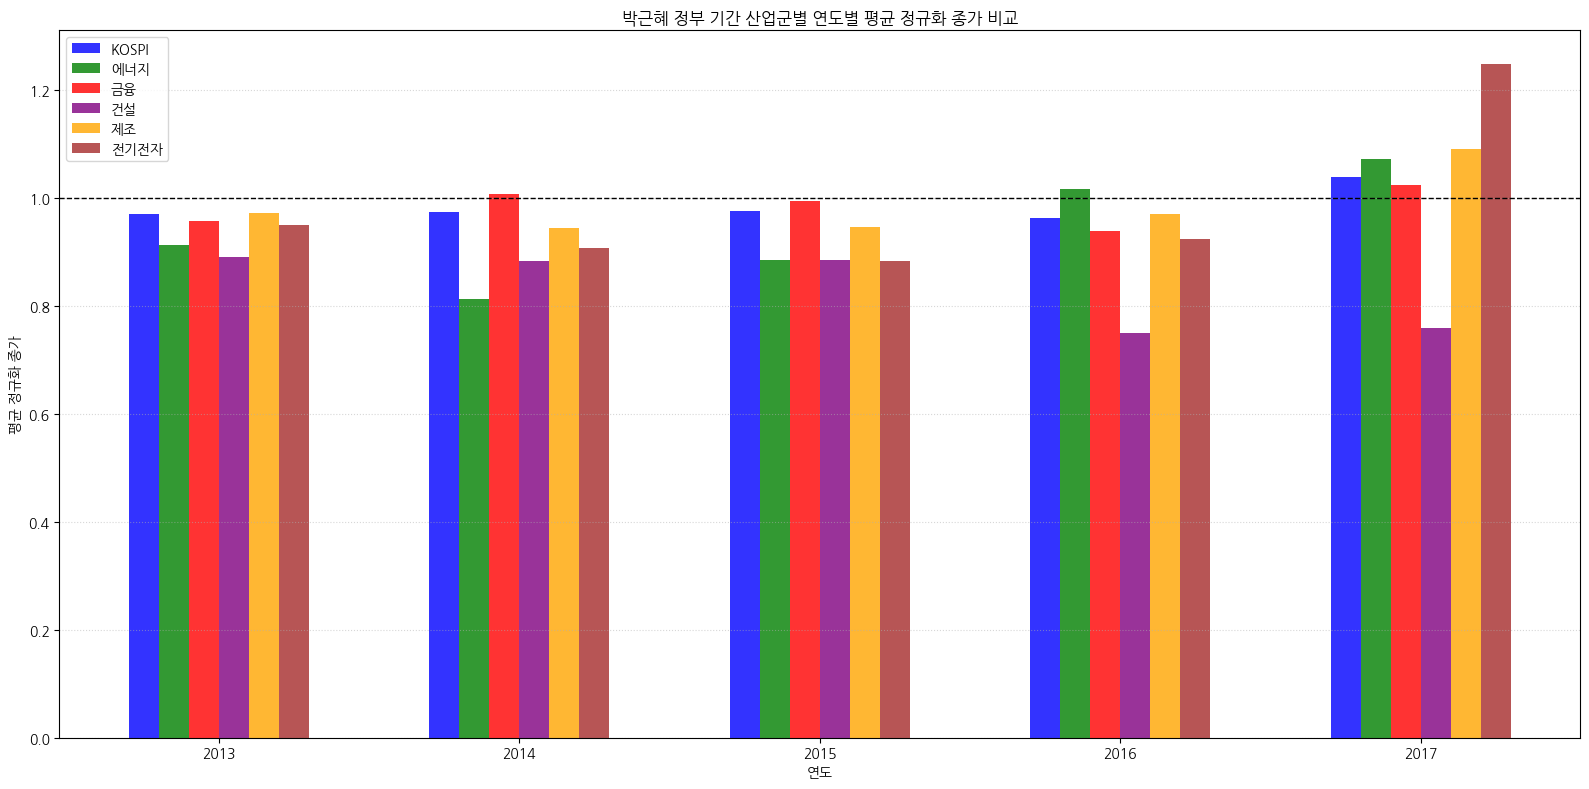

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# 연도별 평균 정규화 종가 저장용 딕셔너리
yearly_avg_values = {}

for i, (sector_name, paths) in enumerate(datasets.items()):
    df = load_and_prepare(paths)
    df['정규화종가'] = df['종가'] / df['종가'].iloc[0]
    
    df['연도'] = df['일자'].dt.year
    yearly_avg = df.groupby('연도')['정규화종가'].mean()
    yearly_avg_values[sector_name] = yearly_avg

# 연도 전체 범위 계산
all_years = sorted(set().union(*(avg.index for avg in yearly_avg_values.values())))

x = np.arange(len(all_years))  # 연도별 x좌표 위치
bar_width = 0.1               # 막대 너비

plt.figure(figsize=(16, 8))

# 각 산업군별로 바(bar) 그리기
for i, (sector, yearly_avg) in enumerate(yearly_avg_values.items()):
    # 연도별 데이터가 없을 수도 있어 all_years 기준으로 NaN 보간
    yearly_data = yearly_avg.reindex(all_years, fill_value=np.nan)
    plt.bar(x + i * bar_width, yearly_data, width=bar_width, label=sector, color=colors[i % len(colors)], alpha=0.8)

# x축 연도 라벨 설정
plt.xticks(x + (bar_width * (len(yearly_avg_values) - 1) / 2), all_years)

plt.axhline(y=1, color='black', linestyle='--', linewidth=1)
plt.title('박근혜 정부 기간 산업군별 연도별 평균 정규화 종가 비교')
plt.xlabel('연도')
plt.ylabel('평균 정규화 종가')
plt.legend()
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.savefig('/home/taemin/dev_ws/EDA/data/all_sectors_yearly_avg.png')




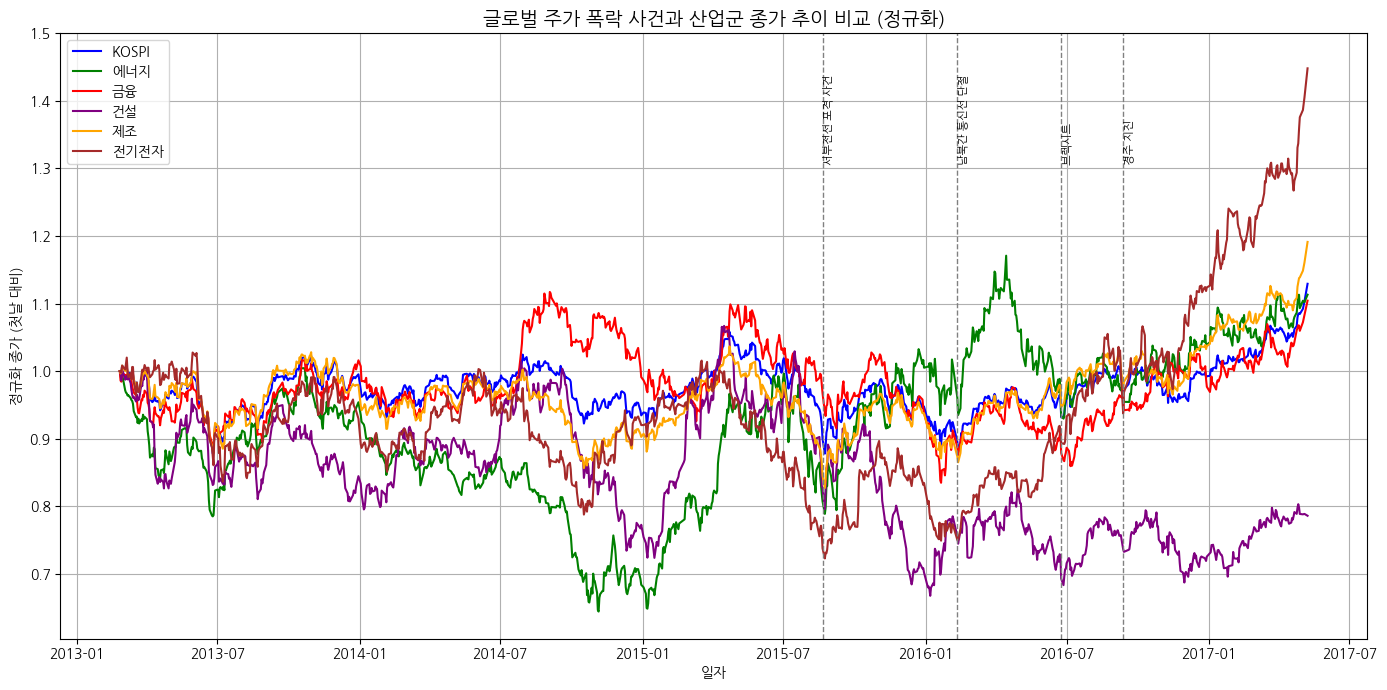

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
from datetime import datetime
# 데이터 불러오기 및 전처리 함수
def load_and_prepare(csv_paths):
    dfs = []
    for path in csv_paths:
        dfs.append(pd.read_csv(path, encoding='euc-kr'))
    df = pd.concat(dfs, ignore_index=True)
    df['일자'] = pd.to_datetime(df['일자'], errors='coerce')
    df = df.sort_values(by='일자')
    return df
# 글로벌 주가 폭락 Top 4 사건
global_events = [
    {"date": "2016-06-24", "label": " 브렉시트 "},
    {"date": "2016-02-11", "label": " 남북간 통신선 단절 "},
    {"date": "2015-08-21", "label": " 서부전선 포격 사건"},
    {"date": "2016-09-12", "label": " 경주 지진 "}
]
# 섹터별 데이터 경로 정의
datasets = {
    'KOSPI': [
        "/home/taemin/dev_ws/EDA/data/pdata/KOSPI/p_KOSPI1.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/KOSPI/p_KOSPI2.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/KOSPI/p_KOSPI3.csv"
        ],
    '에너지': [
        "/home/taemin/dev_ws/EDA/data/pdata/energy/p_energy1.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/energy/p_energy2.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/energy/p_energy3.csv"
    ],
    '금융': [
        "/home/taemin/dev_ws/EDA/data/pdata/finance/p_finance1.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/finance/p_finance2.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/finance/p_finance3.csv"
    ],
    '건설': [
        "/home/taemin/dev_ws/EDA/data/pdata/construction/p_construction1.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/construction/p_construction2.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/construction/p_construction3.csv"
    ],
    '제조': [
        "/home/taemin/dev_ws/EDA/data/pdata/manufacturing/p_manufacturing1.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/manufacturing/p_manufacturing2.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/manufacturing/p_manufacturing3.csv"
    ],
    '전기전자': [
        "/home/taemin/dev_ws/EDA/data/pdata/electronics/p_electronics1.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/electronics/p_electronics2.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/electronics/p_electronics3.csv"
    ]
}
# 섹터별 색상
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']
# 차트 생성
plt.figure(figsize=(14, 7))
# 섹터별 라인 차트 그리기
for i, (sector_name, paths) in enumerate(datasets.items()):
    df = load_and_prepare(paths)
    df['정규화종가'] = df['종가'] / df['종가'].iloc[0]
    plt.plot(df['일자'], df['정규화종가'], label=sector_name, color=colors[i])
# 글로벌 이벤트 표시

# y축 범위 설정 (최대값 조금 여유있게)
plt.ylim(bottom=plt.ylim()[0], top=1.5)  # 필요에 따라 top 값을 조절하세요

for event in global_events:
    event_date = pd.to_datetime(event["date"])
    plt.axvline(x=event_date, color='gray', linestyle='--', linewidth=1)
    
    # 텍스트 위치 고정 (y=1.85 위치에)
    plt.text(event_date, 1.3, event["label"], rotation=90,
             verticalalignment='bottom', fontsize=8, color='black')




# 차트 제목 및 스타일 설정
plt.title('글로벌 주가 폭락 사건과 산업군 종가 추이 비교 (정규화)', fontsize=14)
plt.xlabel('일자')
plt.ylabel('정규화 종가 (첫날 대비)')
plt.legend()
plt.grid(True)
plt.tight_layout()
# plt.savefig('/home/lim/dev_ws/EDA/data/compare_all.png')
plt.show()



